In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')

In [2]:
sales_data = pd.read_csv("Champagne_Sales.csv")

In [3]:
sales_data.head()

Month  Champagne sales
0  1964-01             2815
1  1964-02             2672
2  1964-03             2755
3  1964-04             2721
4  1964-05             2946

In [4]:
sales_data.tail()

Month  Champagne sales
100  1972-05             4618
101  1972-06             5312
102  1972-07             4298
103  1972-08             1413
104  1972-09             5877

In [5]:
sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [6]:
sales_data.head()

Month  Champagne sales
0 1964-01-01             2815
1 1964-02-01             2672
2 1964-03-01             2755
3 1964-04-01             2721
4 1964-05-01             2946

In [7]:
sales_data.set_index('Month',inplace=True)

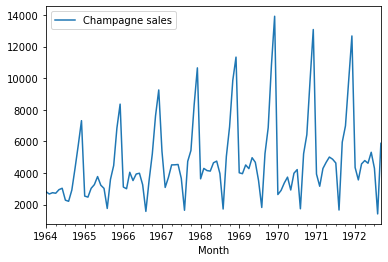

In [8]:
sales_data.plot()

In [9]:
train = sales_data[:85]
test = sales_data[-20:]

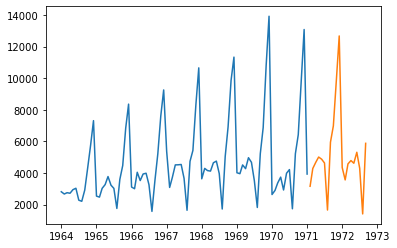

In [10]:
plt.plot(train)
plt.plot(test)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [12]:
#!pip install pmdarima

In [13]:
from pmdarima.arima import auto_arima

In [14]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1203.853, Time=0.66 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1192.025, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1176.246, Time=0.49 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1174.731, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1176.034, Time=0.32 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1176.700, Time=0.66 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1175.054, Time=0.15 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1174.769, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1194.721, Time=0.02 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1174.564, Time=0.21 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1176.645, Time=1.63 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1176.127, Time=0.27 sec
 ARIMA(1,1,3)(0,1,0)[12]     

In [15]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 20),index=test.index)
prediction.columns = ['predicted_sales']
prediction

predicted_sales
Month                      
1971-02-01      2746.685277
1971-03-01      3247.924303
1971-04-01      3592.488449
1971-05-01      2800.884067
1971-06-01      3841.886933
1971-07-01      4088.025399
1971-08-01      1596.291530
1971-09-01      5090.002749
1971-10-01      6283.992902
1971-11-01      9709.571624
1971-12-01     12937.196707
1972-01-01      3800.559031
1972-02-01      2608.733737
1972-03-01      3113.766874
1972-04-01      3455.139566
1972-05-01      2666.219707
1972-06-01      3704.964460
1972-07-01      3953.002360
1972-08-01      1459.670763
1972-09-01      4954.725927

In [16]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [17]:
from sklearn.metrics import r2_score
test['predicted_sales'] = prediction
r2_score(test['Champagne sales'], test['predicted_sales'])

0.8114731566291633

In [49]:
n_p = 10
pred = arima_model.predict(n_periods = n_p)

In [50]:
plt.plot(pred)

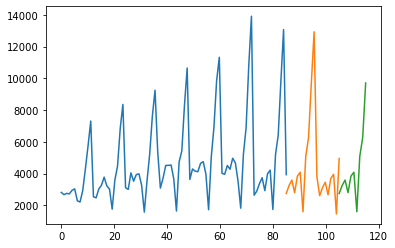

In [51]:
#unisci train-test e predicton

x_train = np.linspace(0,train.size,train.size)
x_test = np.linspace(train.size,train.size+prediction.size,prediction.size)

x_pred = np.linspace(train.size+prediction.size,
                     train.size+prediction.size+n_p,n_p)

plt.plot(x_train,train.values)
plt.plot(x_test,prediction.values)
plt.plot(x_pred,pred)